# Comparison between training metrics

In [1]:
!ls /eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/ACAT2022/

best_models_archive	     normalization_factors  tests_norechits_focalloss
best_models_archive.tar.gz   reweightings	    tests_noSoftF1
best_models_exported	     tests		    tests_onlySA
best_models_exported.tar.gz  tests_focal_loss	    tests_simpler_rechits
DeepSCModels.tar.gz	     tests_norechits


In [1]:
import os
models_folder = "/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/"
output_folder= "/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/loss_monitoring_plots"
os.makedirs(output_folder, exist_ok=True)

In [3]:
from glob import glob
import os
from os import path
import json
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import mplhep as hep

hep.style.use(hep.style.ROOT)
import matplotlib as mtp
mtp.rcParams['figure.dpi'] = 72

In [4]:
trainings = glob(f"{models_folder}/*/*/training_history.csv", recursive=True)
trainings

['/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_05_235noise_235thres_2M_larger/training_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_03_noise235_235thres_largerL2drop/training_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_06_235noise_235thres_2M_larger_etlog/training_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_04_noise235_235thres_largerL2drop_smallerLR/training_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_08_235_235_2M_verysmall/training_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_11_235_235_1.5M_verylarge_smallerdrop/training_history.csv',
 '/work/dval

In [11]:
trainings = glob(f"{models_folder}/*/*/metrics_history.csv", recursive=True)
trainings

['/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_05_235noise_235thres_2M_larger/metrics_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_01_noise235_235thres/metrics_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_03_noise235_235thres_largerL2drop/metrics_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_06_235noise_235thres_2M_larger_etlog/metrics_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_04_noise235_235thres_largerL2drop_smallerLR/metrics_history.csv',
 '/work/dvalsecc/Clustering/models_archive/gcn_models/PFRechitsThresholsTests/models_235noise_235thres/run_08_235_235_2M_verysmall/metrics_history.csv',
 '/work/dvalsecc/Clustering/models_

In [12]:
metrics = [
    "lr", "lr_reduce","early_stop",
    "dropout","l2_reg", "l2reg_alpha",
    "opt", "activation", 
    "output_dim_rechits", "output_dim_nodes",
    "output_dim_gconv",
    "output_dim_sa_clclass",
    "output_dim_sa_windclass",
    "output_dim_sa_enregr",
    "coord_dim",
    "coord_dim_sa",
    "nconv_rechits",
    "nconv",
    "layers_input",
    "layers_clclass",
    "layers_windclass",
    "layers_enregr",
]

In [13]:
def load_training_info(basedir):
    config = json.load(open(path.join(basedir, "training_config.json")))
    metadata = {}
    for m in metrics:
        metadata[m] = config.get(m, None)
    metadata["loss_weights"] = config["loss_weights"]
    metadata["n_layers_input"] = len(config["layers_input"])
    metadata["n_layers_clclass"] = len(config["layers_clclass"])
    metadata["n_layers_windclass"] = len(config["layers_windclass"])
    metadata["n_layers_enregr"] = len(config["layers_enregr"])
    metadata["tot_nodes_input"] = sum(config["layers_input"])
    metadata["tot_nodes_clclass"] = sum(config["layers_clclass"])
    metadata["tot_nodes_windclass"] = sum(config["layers_windclass"])
    metadata["tot_nodes_enregr"] = sum(config["layers_enregr"])
    logs = pd.read_csv(path.join(basedir, "metrics_history.csv"), sep=",")
    return metadata, logs

### Collecting data

In [14]:
metadata = {} 
logs = {}
best_values = {}
for tr in trainings:
    p = tr.split("/")
    basedir = path.dirname(tr)
    name = f"{p[-3]}/{p[-2]}"
    m, l = load_training_info(basedir)
    metadata[name] = m 
    logs[name] = l
    best_values[name] = l

### Plots

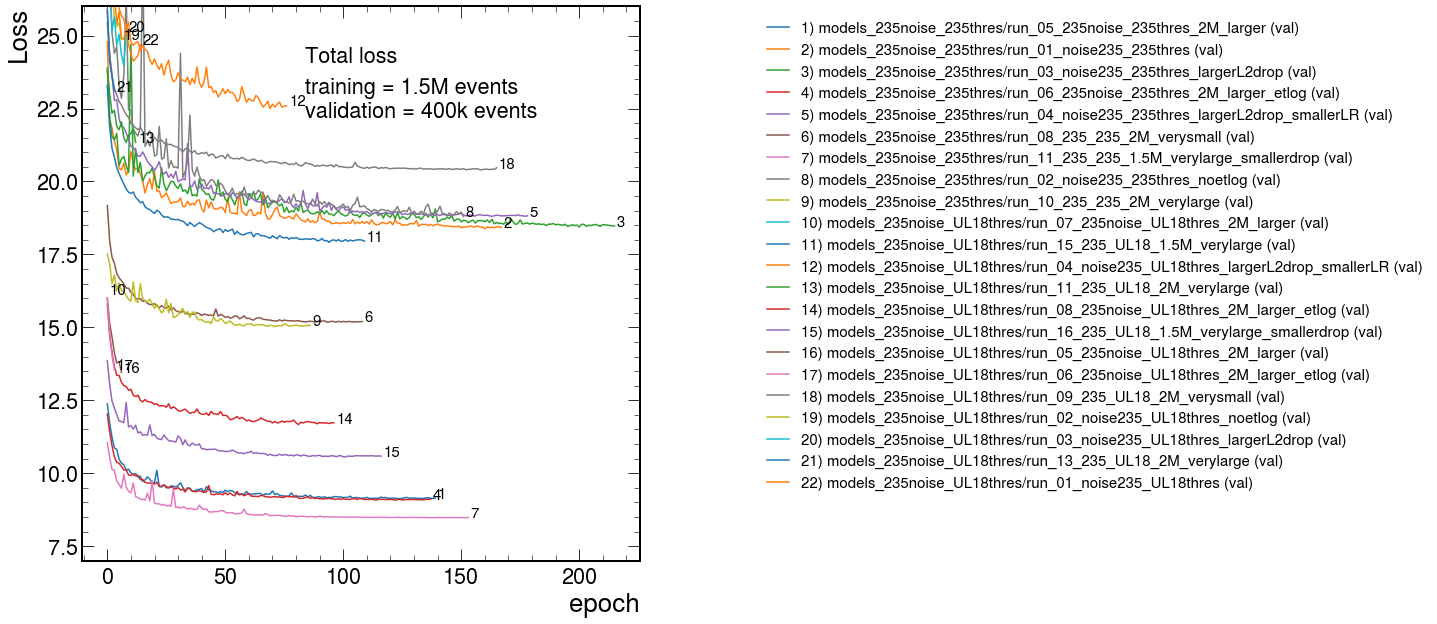

In [15]:
fig = plt.figure()
ax = plt.gca()
for i, (name, l) in enumerate(logs.items()):
    ax.plot(l.val_loss,label=f"{i+1}) {name} (val)")
    ax.text(len(l.val_loss), l.val_loss.values[-1],f"{i+1}",fontsize=15)
#     ax.plot(l.loss,label=f"{i+1}b) {name} (train)", linestyle="dashed")
#     ax.text(len(l.loss), l.loss.values[-1],f"{i+1}b",fontsize=15)

ax.legend(fontsize="15",bbox_to_anchor=(1.2, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
ax.set_ylim(7, 26)

ax.text(0.4, 0.9,"Total loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")

fig.savefig(f"{output_folder}/val_loss_total.png")
fig.savefig(f"{output_folder}/val_loss_total.pdf")
fig.savefig(f"{output_folder}/val_loss_total.svg")

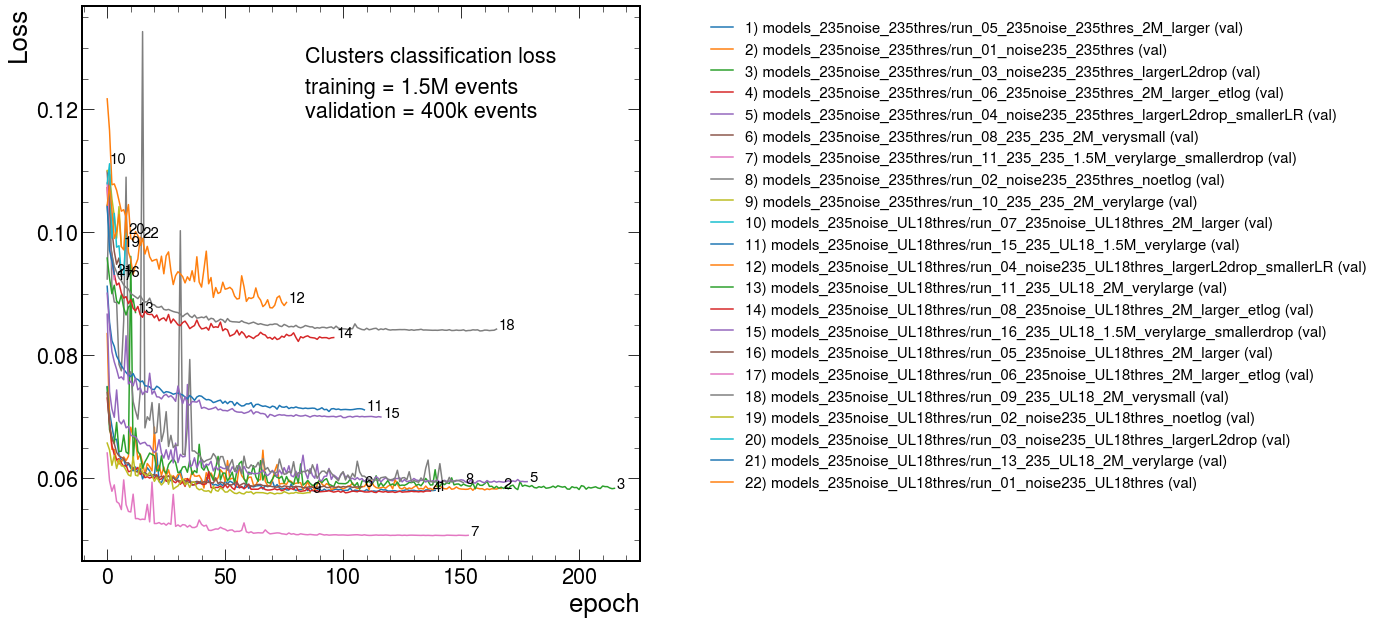

In [16]:
fig = plt.figure()
ax = plt.gca()
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l.val_loss_clusters,label=f"{i+1}) {name} (val)")
    ax.text(len(l.val_loss_clusters), l.val_loss_clusters.values[-1],f"{i+1}",fontsize=15)
    #ax.plot(l.loss_clusters,label=f"{i+1}b) {name} (train)", linestyle="dashed")
    #ax.text(len(l.loss_clusters), l.loss_clusters.values[-1],f"{i+1}b",fontsize=15)

ax.legend(fontsize="15", bbox_to_anchor=(1.1, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
#ax.set_ylim(0.03, 0.10)

ax.text(0.4, 0.9,"Clusters classification loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")


fig.savefig(f"{output_folder}/val_loss_clusters.png")
fig.savefig(f"{output_folder}/val_loss_clusters.pdf")
fig.savefig(f"{output_folder}/val_loss_clusters.svg")

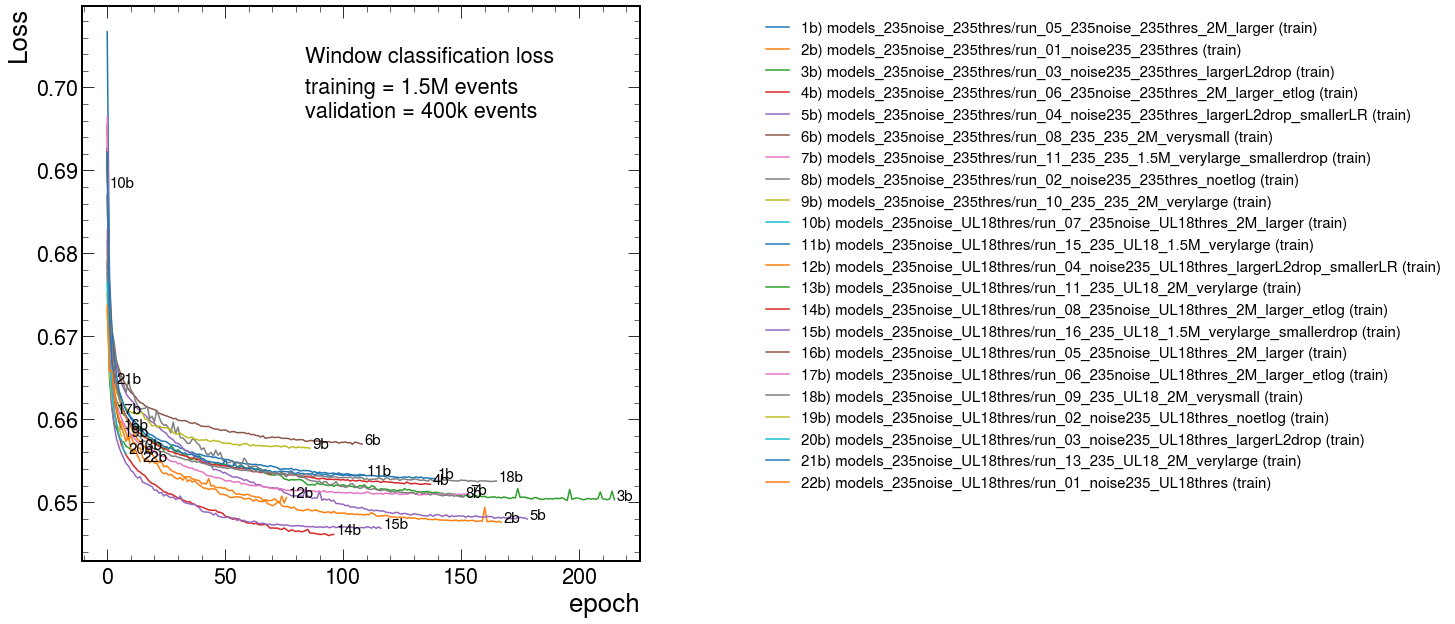

In [18]:
fig = plt.figure()
ax = plt.gca()
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    #ax.plot(l.val_loss_windows,label=f"{i+1}) {name} (val)")
    #ax.text(len(l.val_loss_windows), l.val_loss_windows.values[-1],f"{i+1}",fontsize=15)
    ax.plot(l.loss_windows,label=f"{i+1}b) {name} (train)")
    ax.text(len(l.loss_windows), l.loss_windows.values[-1],f"{i+1}b",fontsize=15)

ax.legend(fontsize="15",bbox_to_anchor=(1.2, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
#ax.set_ylim(0.632, 0.65)

ax.text(0.4, 0.9,"Window classification loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")


fig.savefig(f"{output_folder}/val_loss_windows.png")
fig.savefig(f"{output_folder}/val_loss_windows.pdf")
fig.savefig(f"{output_folder}/val_loss_windows.svg")

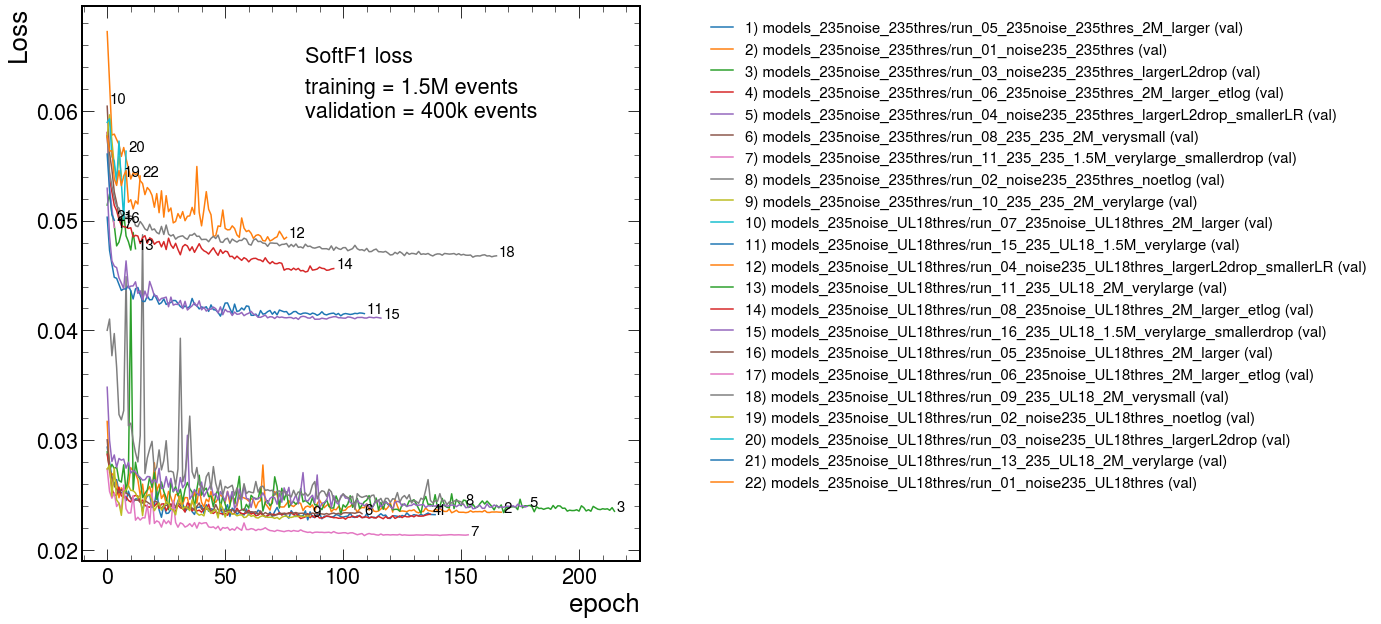

In [19]:
fig = plt.figure()
ax = plt.gca()
loss = "softF1"
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l[f"val_loss_{loss}"],label=f"{i+1}) {name} (val)")
    ax.text(len(l[f"val_loss_{loss}"]), l[f"val_loss_{loss}"].values[-1],f"{i+1}",fontsize=15)
    #ax.plot(l[f"loss_{loss}"],label=f"{i+1}b) {name} (train)", linestyle="dashed")
    #ax.text(len(l[f"loss_{loss}"]), l[f"loss_{loss}"].values[-1],f"{i+1}b",fontsize=15)

ax.legend(fontsize="15", bbox_to_anchor=(1.1, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
#x.set_ylim(0.035, 0.053)

ax.text(0.4, 0.9,"SoftF1 loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")


fig.savefig(f"{output_folder}/val_loss_softF1.png")
fig.savefig(f"{output_folder}/val_loss_softF1.pdf")
fig.savefig(f"{output_folder}/val_loss_softF1.svg")

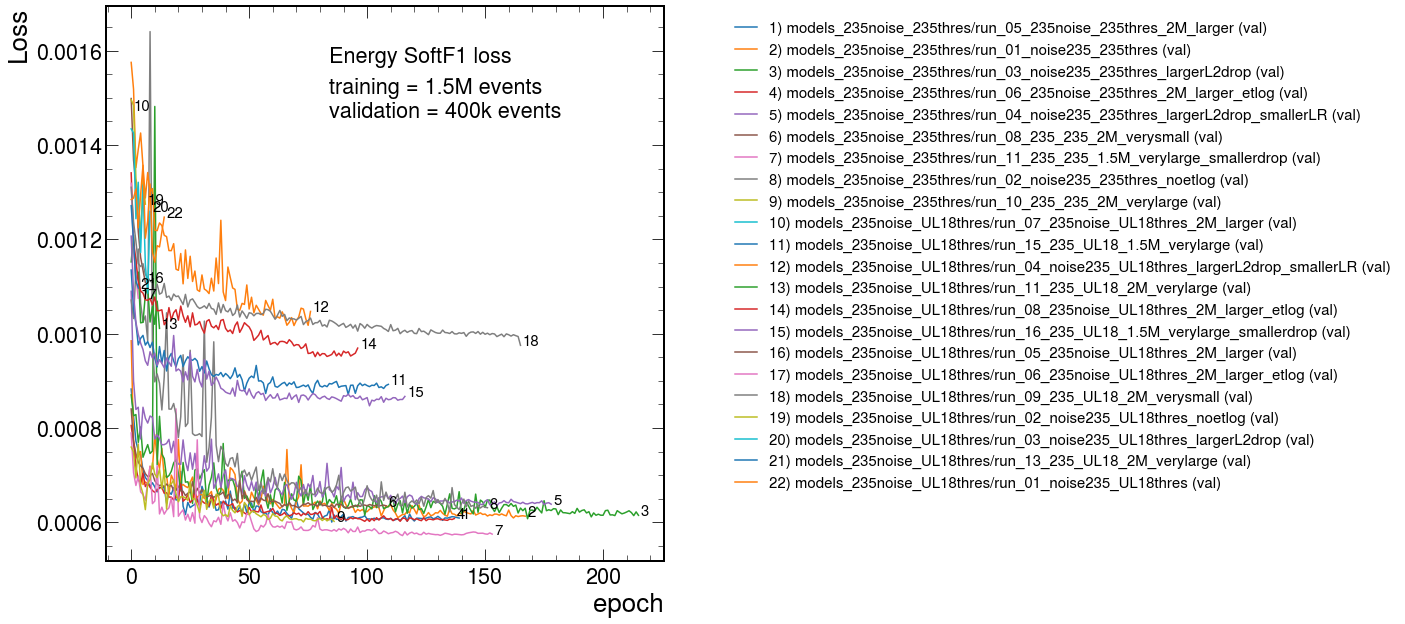

In [21]:
fig = plt.figure()
ax = plt.gca()
loss = "en_softF1"
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l[f"val_loss_{loss}"],label=f"{i+1}) {name} (val)")
    ax.text(len(l[f"val_loss_{loss}"]), l[f"val_loss_{loss}"].values[-1],f"{i+1}",fontsize=15)
    # ax.plot(l[f"loss_{loss}"],label=f"{i+1}b) {name} (train)", linestyle="dashed")
    # ax.text(len(l[f"loss_{loss}"]), l[f"loss_{loss}"].values[-1],f"{i+1}b",fontsize=15)

ax.legend(fontsize="15", bbox_to_anchor=(1.1, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
#ax.set_ylim(0.0005, 0.001)

ax.text(0.4, 0.9,"Energy SoftF1 loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")


fig.savefig(f"{output_folder}/val_loss_energy_softF1.png")
fig.savefig(f"{output_folder}/val_loss_energy_softF1.pdf")
fig.savefig(f"{output_folder}/val_loss_energy_softF1.svg")

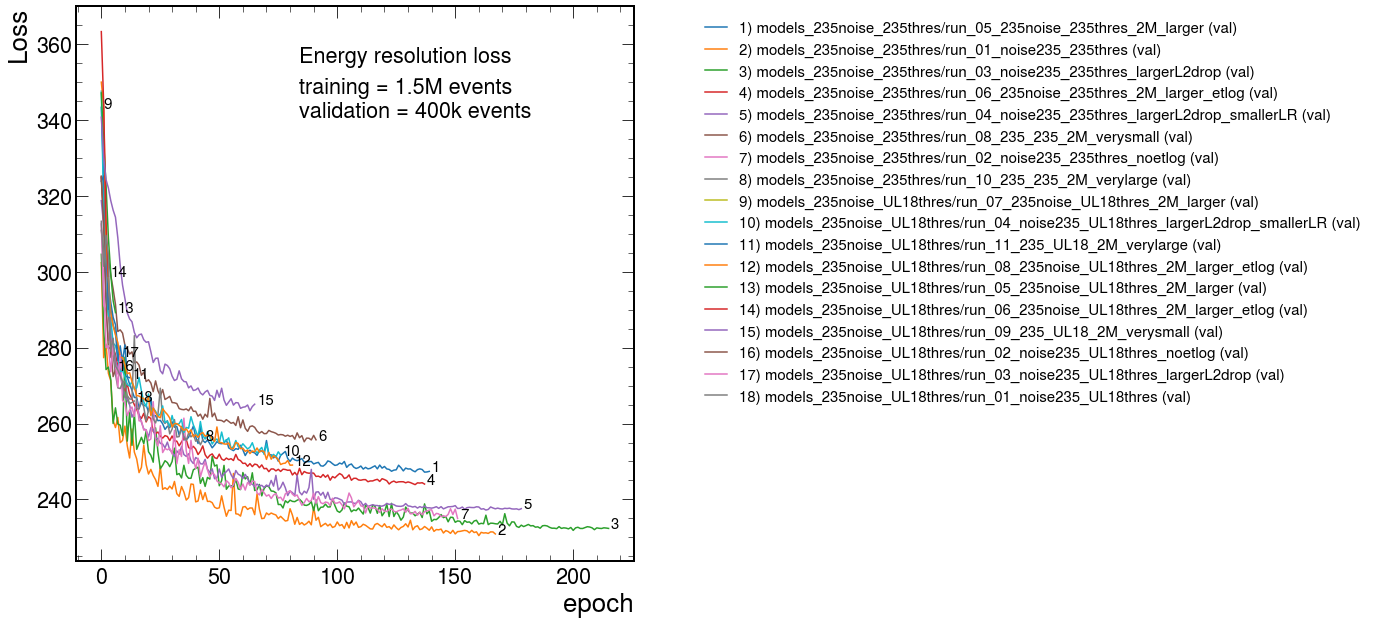

In [60]:
fig = plt.figure()
ax = plt.gca()
loss = "en_regr"
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l[f"val_loss_{loss}"],label=f"{i+1}) {name} (val)")
    ax.text(len(l[f"val_loss_{loss}"]), l[f"val_loss_{loss}"].values[-1],f"{i+1}",fontsize=15)
    #ax.plot(l[f"loss_{loss}"],label=f"{i+1}b) {name} (train)", linestyle="dashed")
    #ax.text(len(l[f"loss_{loss}"]), l[f"loss_{loss}"].values[-1],f"{i}b",fontsize=15)

ax.legend(fontsize="15", bbox_to_anchor=(1.1, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
#ax.set_ylim(54, 67)

ax.text(0.4, 0.9,"Energy resolution loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")

fig.savefig(f"{output_folder}/val_loss_energy_resol.png")
fig.savefig(f"{output_folder}/val_loss_energy_resol.pdf")
fig.savefig(f"{output_folder}/val_loss_energy_resol.svg")

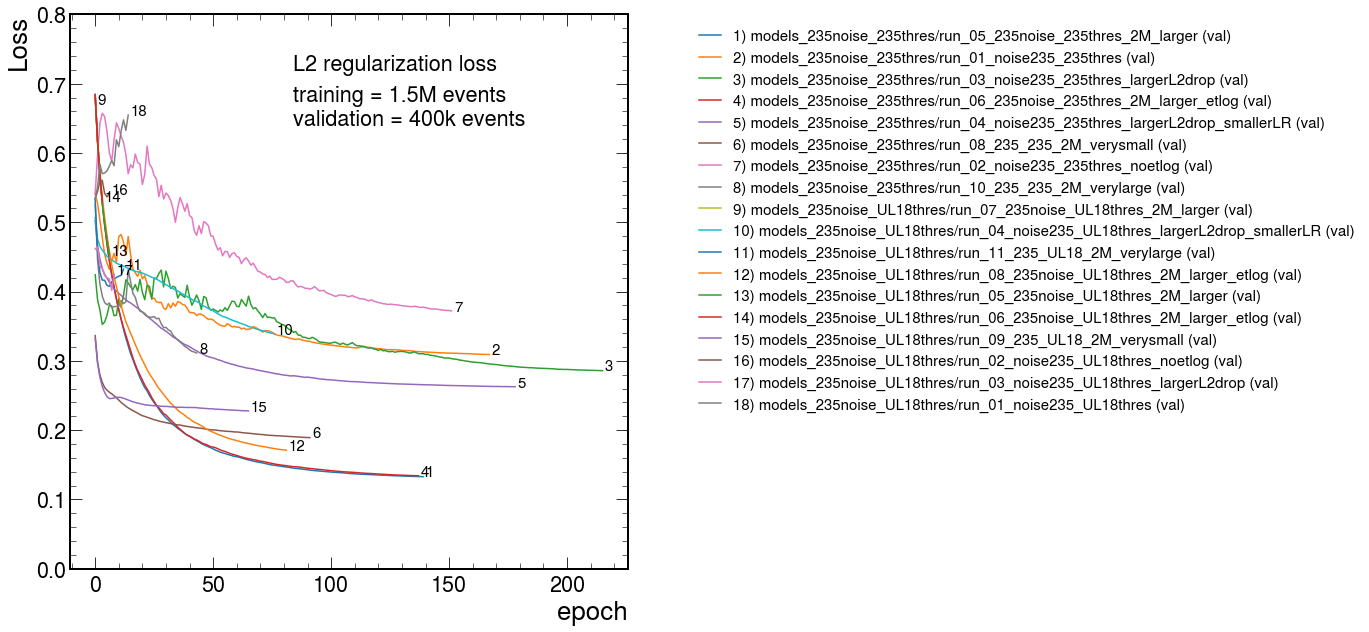

In [62]:
fig = plt.figure()
ax = plt.gca()
loss = "regularization"
for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l[f"val_loss_{loss}"],label=f"{i+1}) {name} (val)")
    ax.text(len(l[f"val_loss_{loss}"]), l[f"val_loss_{loss}"].values[-1],f"{i+1}",fontsize=15)
    
ax.legend(fontsize="15", bbox_to_anchor=(1.1, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
ax.set_ylim(0., 0.8)

ax.text(0.4, 0.9,"L2 regularization loss", transform=ax.transAxes,fontsize="small")
ax.text(0.4, 0.8,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")

fig.savefig(f"{output_folder}/l2_regularization.png")
fig.savefig(f"{output_folder}/l2_regularization.pdf")
fig.savefig(f"{output_folder}/l2_regularization.svg")

AttributeError: 'DataFrame' object has no attribute 'lr'

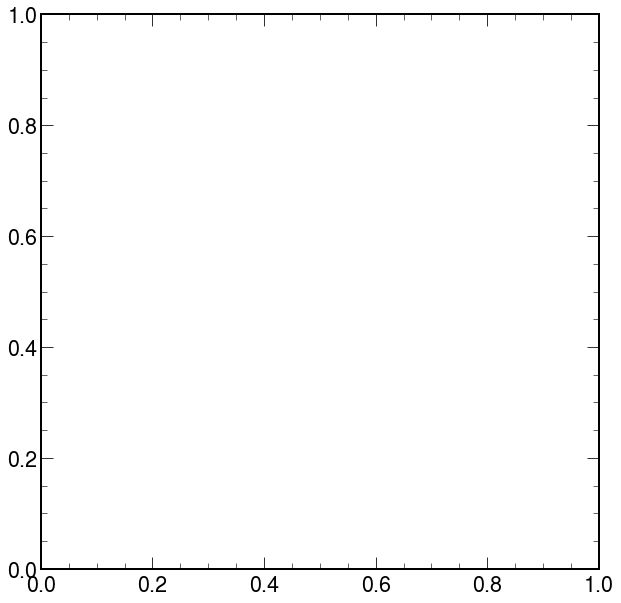

In [22]:
fig = plt.figure()
ax = plt.gca()

for i, (name, l) in enumerate(logs.items()):
    if "focal_loss" in name: continue
    ax.plot(l.lr,label=f"{i+1}) {name} (val)")
    ax.text(len(l.lr), l.lr.values[-1],f"{i+1}",fontsize=15)
    
ax.legend(fontsize="15", bbox_to_anchor=(1.1, 1.), bbox_transform=ax.transAxes)
ax.set_xlabel("epoch")
ax.set_ylabel("Loss")
#ax.set_ylim(0.1, 0.4)

ax.set_yscale("log")

ax.text(0.55, 0.94,"Learning rate", transform=ax.transAxes,fontsize="small")
ax.text(0.55, 0.84,"training = 1.5M events\nvalidation = 400k events", transform=ax.transAxes,fontsize="small")


fig.savefig(f"{output_folder}/learning_rate.png")
fig.savefig(f"{output_folder}/learning_rate.pdf")
fig.savefig(f"{output_folder}/learning_rate.svg")

# Comparison of best loss and hyper parameters

In [26]:
metadata

{'tests/run_32_standard_datasetv10': {'lr': 0.001,
  'lr_reduce': {'factor': 0.5, 'patience': 3, 'min_delta': 0.001},
  'early_stop': {'patience': 20, 'min_delta': 0.001},
  'dropout': 0.1,
  'l2_reg': True,
  'l2reg_alpha': None,
  'opt': 'adam',
  'activation': 'elu',
  'output_dim_rechits': 25,
  'output_dim_nodes': 64,
  'output_dim_gconv': 64,
  'output_dim_sa_clclass': 64,
  'output_dim_sa_windclass': 64,
  'output_dim_sa_enregr': 64,
  'coord_dim': 3,
  'coord_dim_sa': 15,
  'nconv_rechits': 4,
  'nconv': 3,
  'layers_input': [256, 128, 128, 64],
  'layers_clclass': [256, 128, 128, 64],
  'layers_windclass': [128, 64, 64],
  'layers_enregr': [256, 128, 128, 64],
  'loss_weights': {'clusters': 100,
   'window': 1,
   'softF1': 1,
   'en_resol': 0,
   'en_softF1': 100,
   'en_regr': 0.05,
   'softF1_beta': 1.5}},
 'tests_focal_loss/run_03_datasetv10': {'lr': 0.001,
  'lr_reduce': {'factor': 0.5, 'patience': 3, 'min_delta': 0.001},
  'early_stop': {'patience': 20, 'min_delta': 0.00

In [23]:
def get_data(meta, metric):
    x = [ ]
    y = [ ]
    labels = [ ]

    for i, (name, l) in enumerate(best_values.items()):
        m = metadata[name]
        x.append(m[meta])
        y.append(l[metric])
        labels.append(name)
    return x,y, labels

def get_data_2d(meta1, meta2, metric):
    x = [ ]
    y = [ ]
    labels = [ ]

    for i, (name, l) in enumerate(best_values.items()):
        m = metadata[name]
        x.append((m[meta1], m[meta2]))
        y.append(l[metric])
        labels.append(name)
    return x,y, labels


In [24]:
import matplotlib.colors as mcolors

ValueError: x and y must be the same size

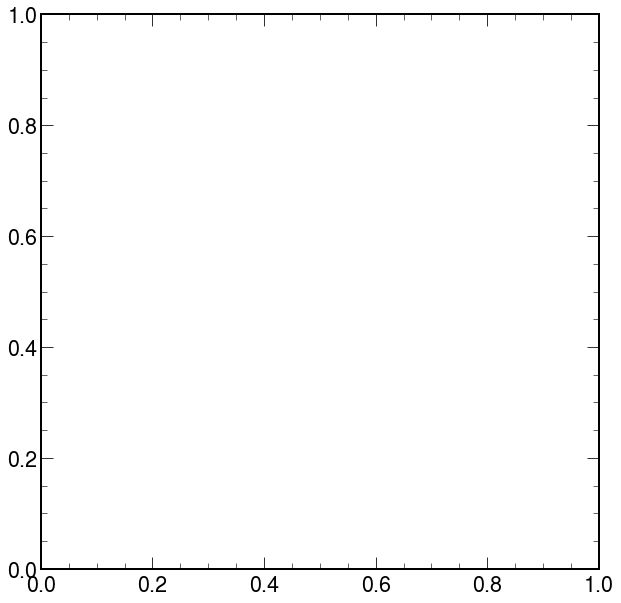

In [25]:
fig = plt.figure()
ax = plt.gca()

meta = "output_dim_nodes"
metric = "val_loss_clusters"

for i, (x, y, label) in enumerate(zip(*get_data(meta, metric))):
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.set_xlabel(meta)
ax.set_ylabel(metric)
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

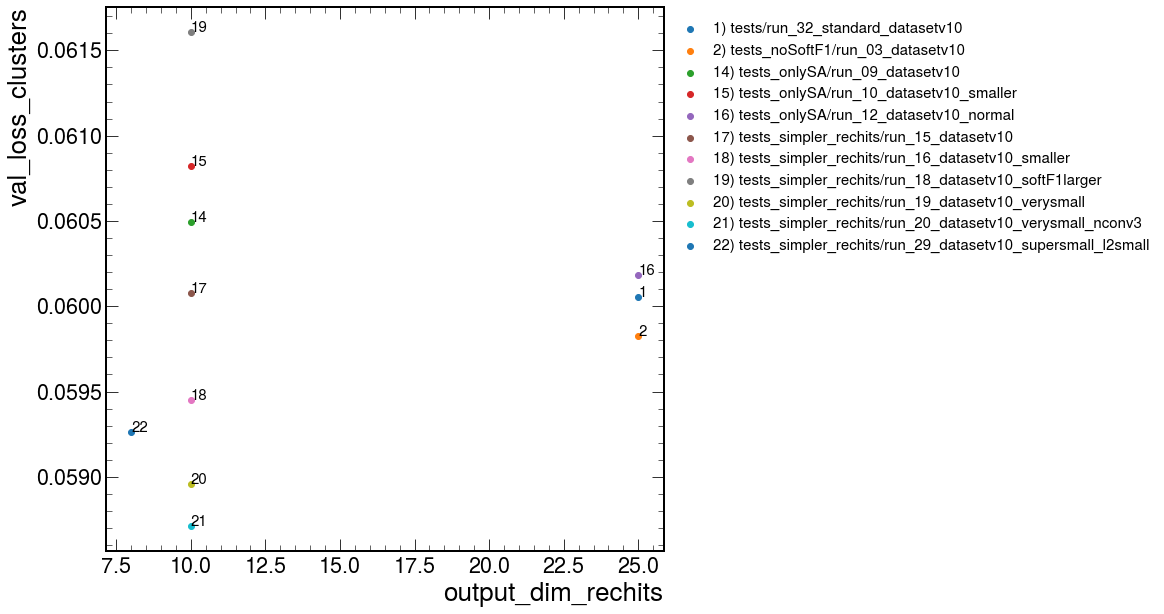

In [40]:
fig = plt.figure()
ax = plt.gca()

meta = "output_dim_rechits"
metric = "val_loss_clusters"

for i, (x, y, label) in enumerate(zip(*get_data(meta, metric))):
    if x == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.set_xlabel(meta)
ax.set_ylabel(metric)
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

In [ ]:
fig = plt.figure()
ax = plt.gca()

meta = "output_dim_rechits"
metric = "val_loss_clusters"

for i, (x, y, label) in enumerate(zip(*get_data(meta, metric))):
    if x == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.set_xlabel(meta)
ax.set_ylabel(metric)
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

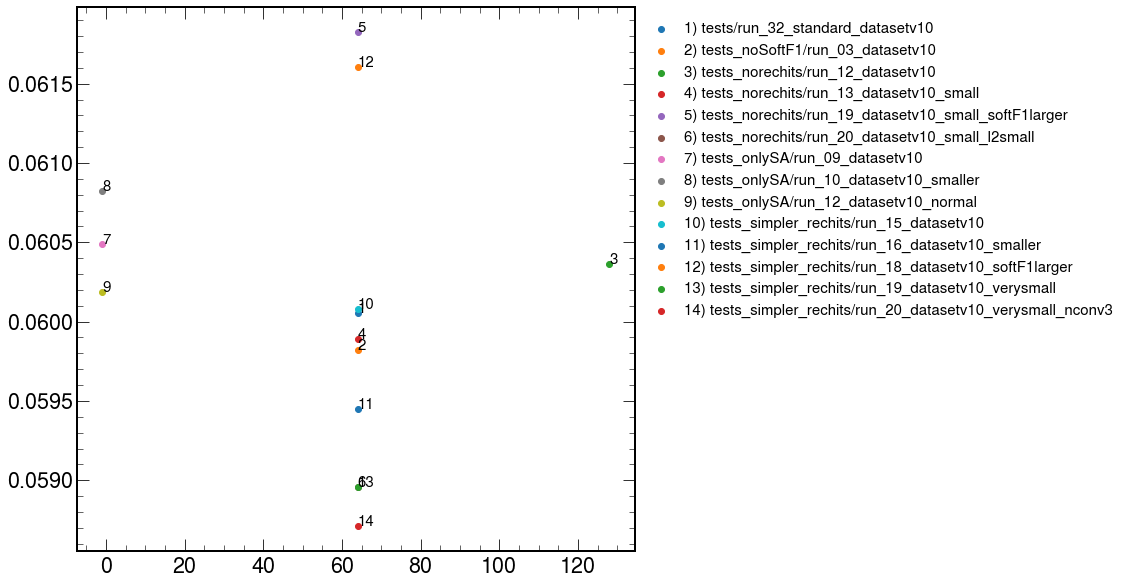

In [80]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("output_dim_gconv", "val_loss_clusters"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

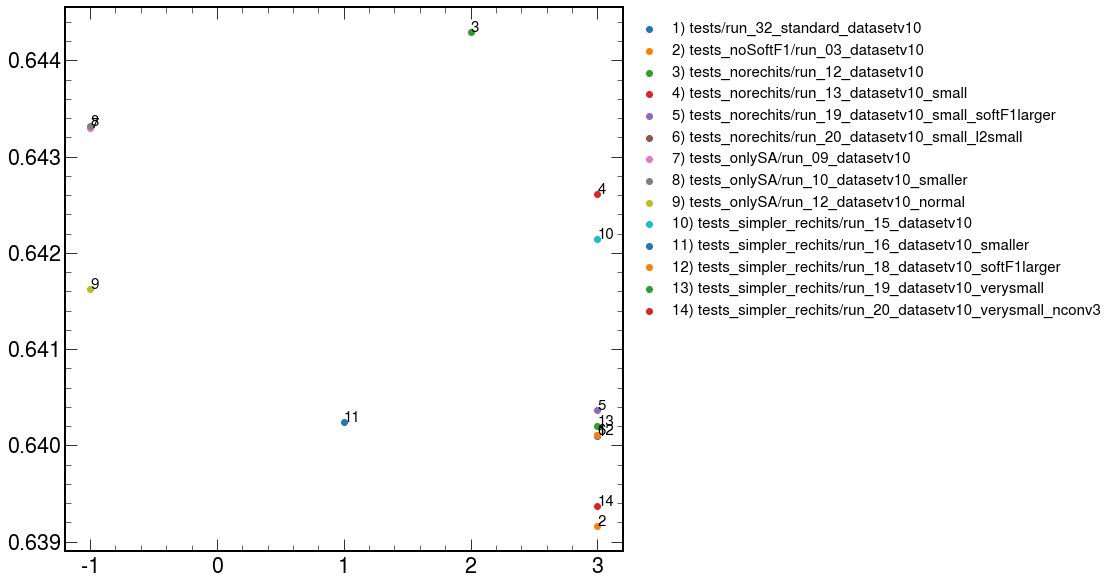

In [82]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("nconv", "val_loss_windows"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

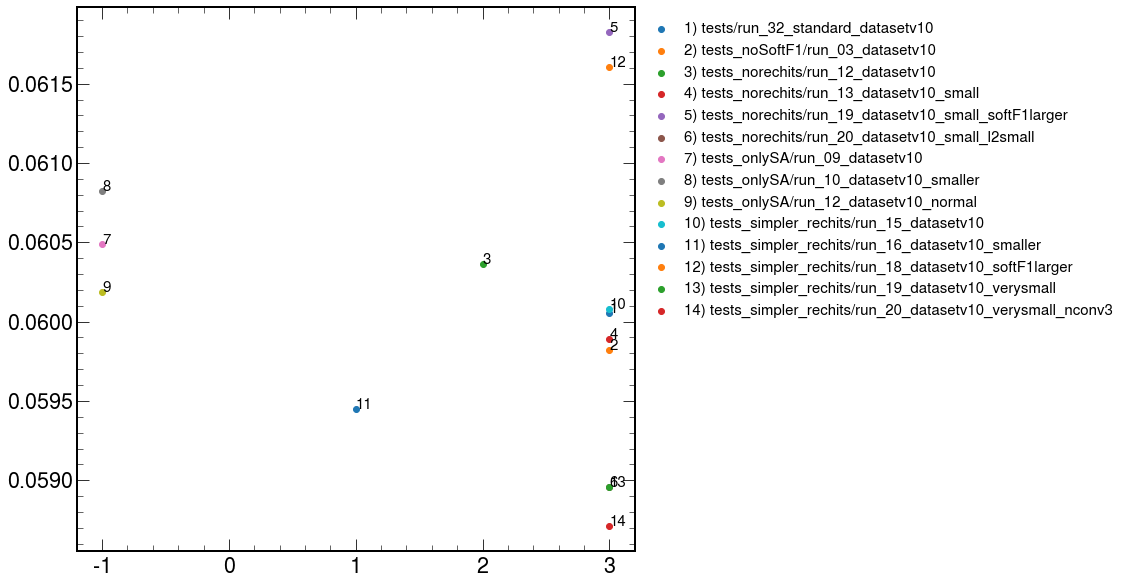

In [81]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("nconv", "val_loss_clusters"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

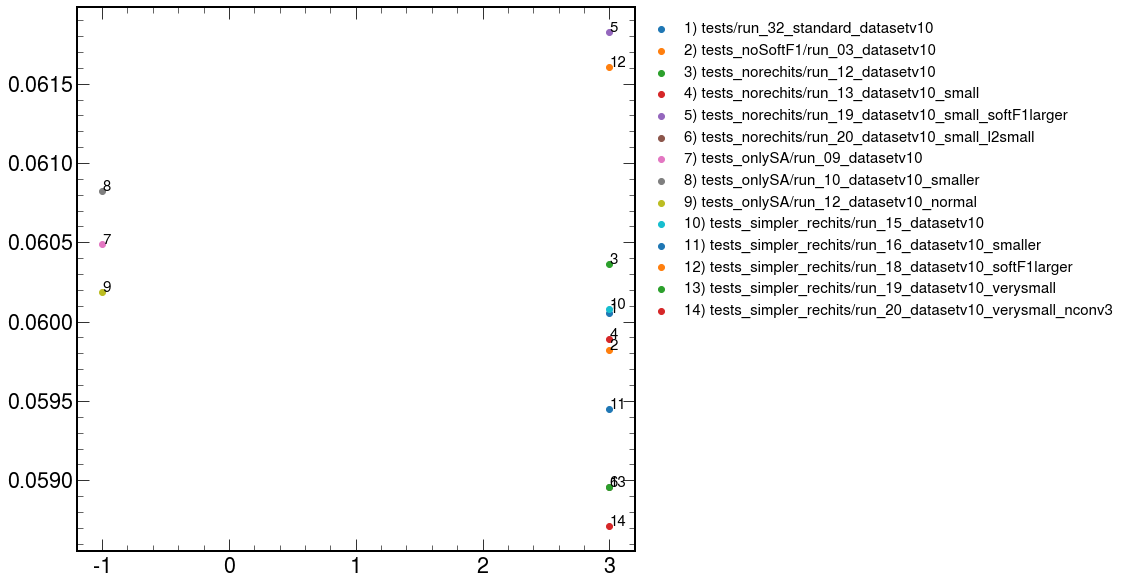

In [83]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("coord_dim", "val_loss_clusters"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

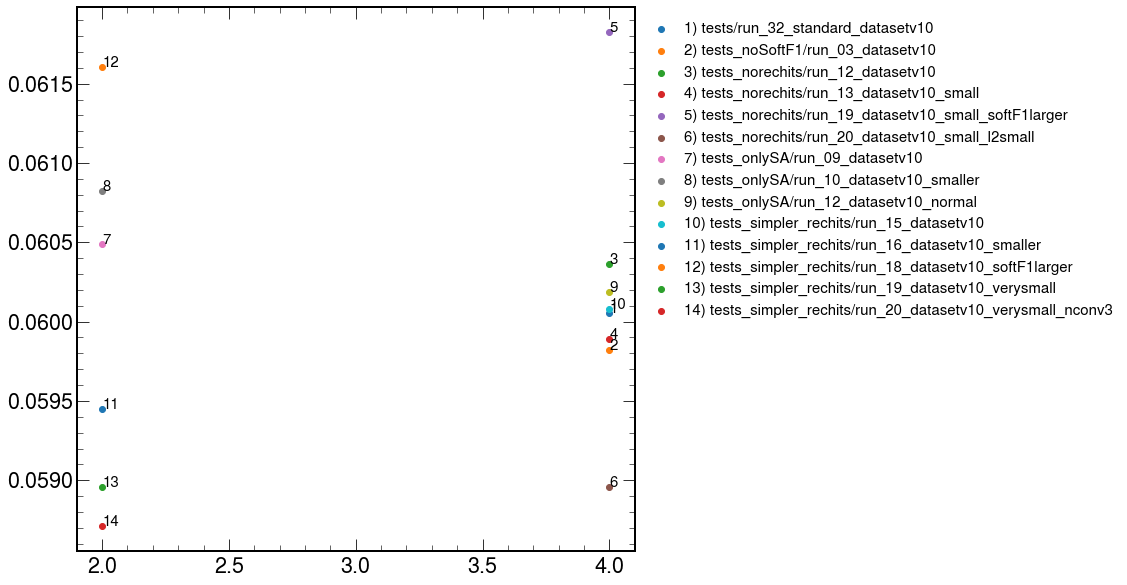

In [92]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("n_layers_enregr", "val_loss_clusters"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

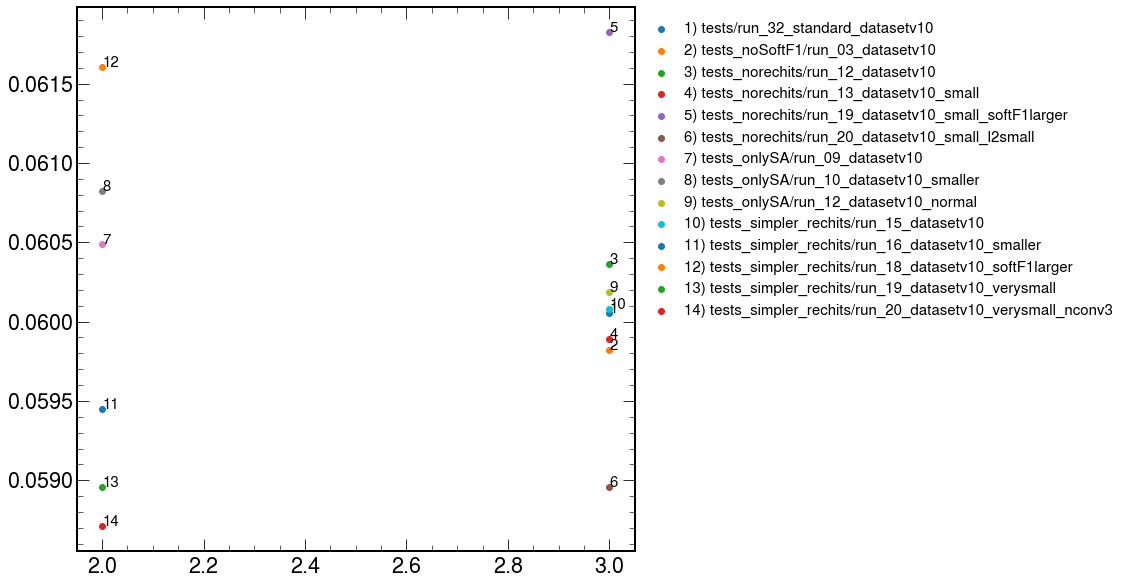

In [89]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("n_layers_windclass", "val_loss_clusters"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

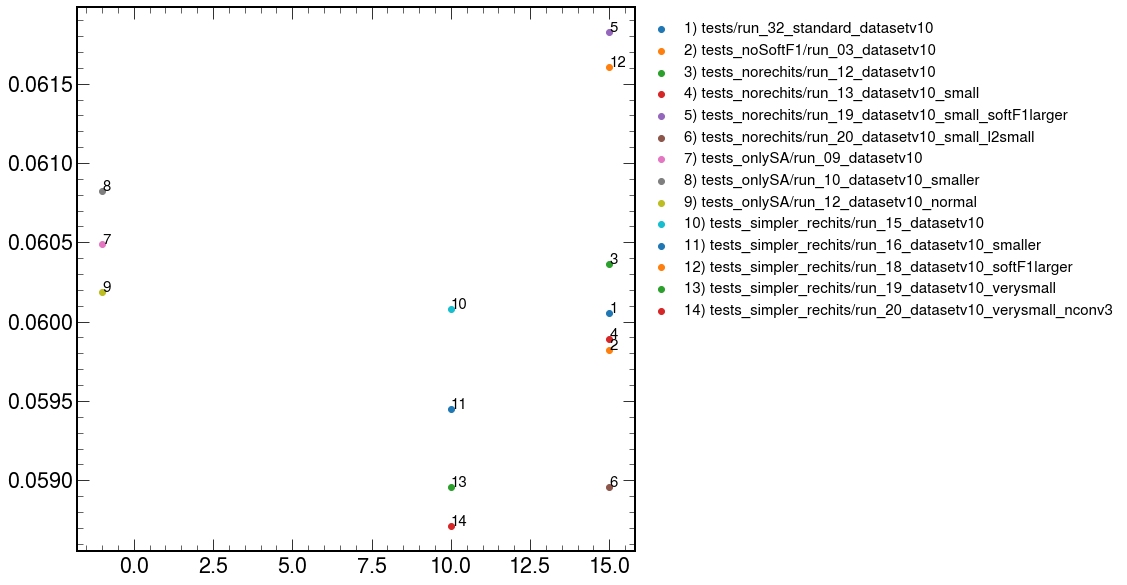

In [84]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("coord_dim_sa", "val_loss_clusters"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

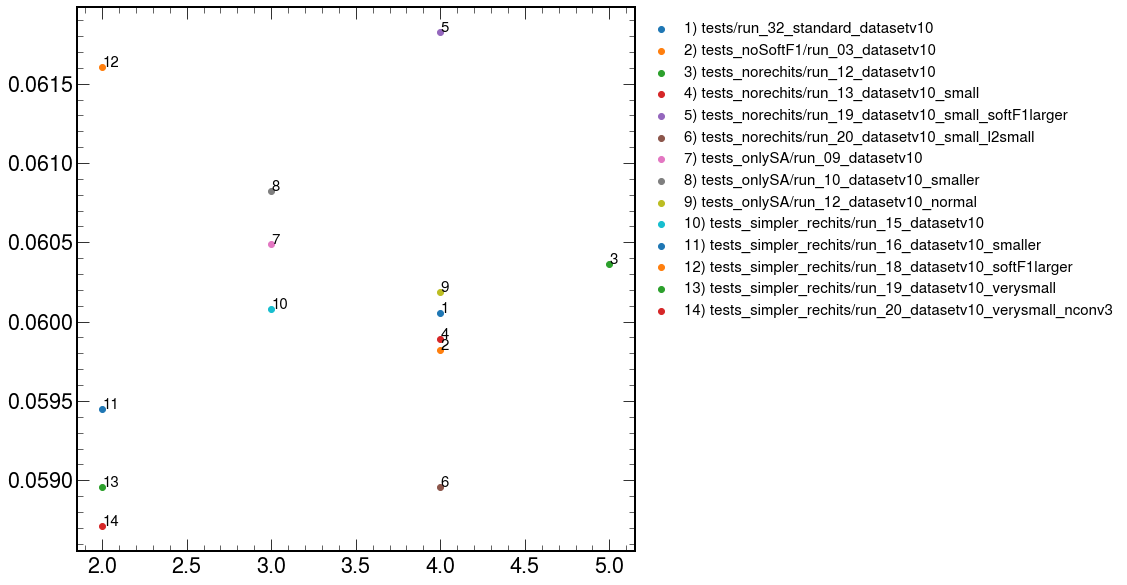

In [91]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("n_layers_clclass", "val_loss_clusters"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

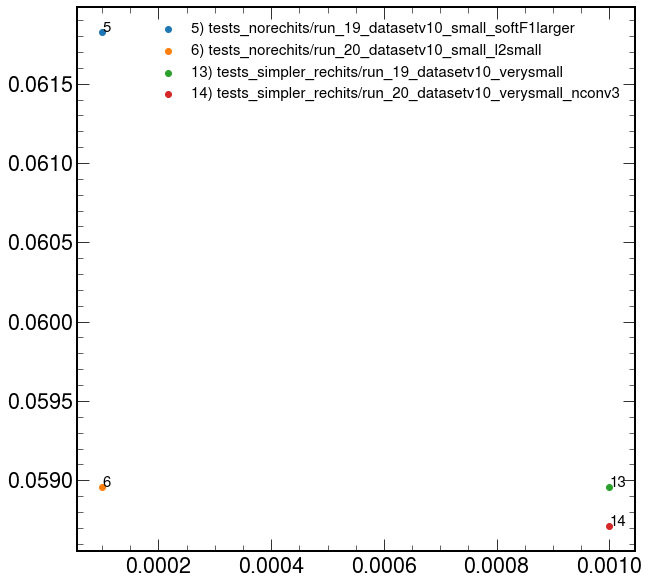

In [93]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("l2reg_alpha", "val_loss_clusters"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

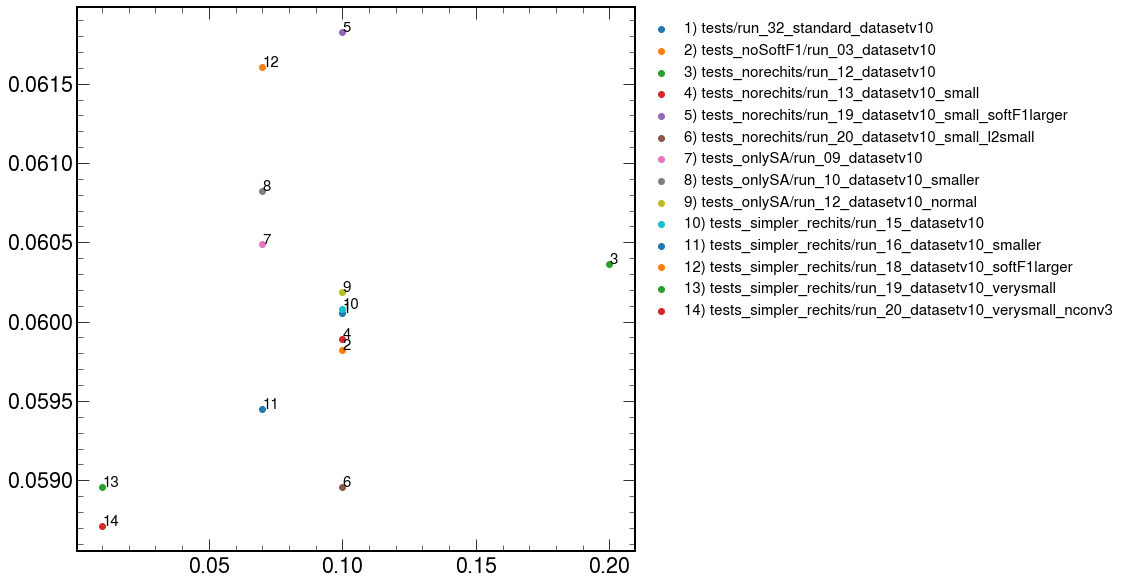

In [94]:
fig = plt.figure()
ax = plt.gca()

for i, (x, y, label) in enumerate(zip(*get_data("dropout", "val_loss_clusters"))):
    if x == None or y == None: continue
    ax.scatter(x,y,label=f"{i+1}) {label}")
    ax.text(x,y, f"{i+1}",fontsize=15)
#plt.legend()
ax.legend(fontsize="15", bbox_to_anchor=(1., 1.), bbox_transform=ax.transAxes)

In [38]:
metadata["tests_norechits/run_20_datasetv10_small_l2small"]

{'lr': 0.001,
 'lr_reduce': {'factor': 0.7, 'patience': 3, 'min_delta': 0.001},
 'early_stop': {'patience': 15, 'min_delta': 0.001},
 'dropout': 0.1,
 'l2_reg': True,
 'l2reg_alpha': 0.0001,
 'opt': 'adam',
 'activation': 'elu',
 'output_dim_rechits': None,
 'output_dim_nodes': 64,
 'output_dim_gconv': 64,
 'output_dim_sa_clclass': 64,
 'output_dim_sa_windclass': 64,
 'output_dim_sa_enregr': 64,
 'coord_dim': 3,
 'coord_dim_sa': 15,
 'nconv_rechits': None,
 'nconv': 3,
 'layers_input': [256, 128, 128, 64],
 'layers_clclass': [256, 128, 128, 64],
 'layers_windclass': [128, 64, 64],
 'layers_enregr': [256, 128, 128, 64],
 'loss_weights': {'clusters': 100,
  'window': 1,
  'softF1': 1,
  'en_resol': 0,
  'en_softF1': 100,
  'en_regr': 0.01,
  'softF1_beta': 1.5},
 'n_layers_input': 4,
 'n_layers_clclass': 4,
 'n_layers_windclass': 3,
 'n_layers_enregr': 4,
 'tot_nodes_input': 576,
 'tot_nodes_clclass': 576,
 'tot_nodes_windclass': 256,
 'tot_nodes_enregr': 576}

In [39]:
metadata["tests_norechits/run_24_datasetv10_supersmall_nconv2_softF1large"]

{'lr': 0.001,
 'lr_reduce': {'factor': 0.6, 'patience': 4, 'min_delta': 0.001, 'min': 1e-07},
 'early_stop': {'patience': 15, 'min_delta': 0.001},
 'dropout': 0.01,
 'l2_reg': True,
 'l2reg_alpha': 0.0001,
 'opt': 'adam',
 'activation': 'elu',
 'output_dim_rechits': None,
 'output_dim_nodes': 32,
 'output_dim_gconv': 32,
 'output_dim_sa_clclass': 32,
 'output_dim_sa_windclass': 32,
 'output_dim_sa_enregr': 32,
 'coord_dim': 3,
 'coord_dim_sa': 10,
 'nconv_rechits': None,
 'nconv': 2,
 'layers_input': [64, 64],
 'layers_clclass': [32, 32],
 'layers_windclass': [32, 32],
 'layers_enregr': [32, 32],
 'loss_weights': {'clusters': 100,
  'window': 1,
  'softF1': 100,
  'en_resol': 0,
  'en_softF1': 100,
  'en_regr': 0.05,
  'softF1_beta': 1.5},
 'n_layers_input': 2,
 'n_layers_clclass': 2,
 'n_layers_windclass': 2,
 'n_layers_enregr': 2,
 'tot_nodes_input': 128,
 'tot_nodes_clclass': 64,
 'tot_nodes_windclass': 64,
 'tot_nodes_enregr': 64}

In [40]:
metadata["tests_simpler_rechits/run_20_datasetv10_verysmall_nconv3"]

{'lr': 0.001,
 'lr_reduce': {'factor': 0.5, 'patience': 3, 'min_delta': 0.001},
 'early_stop': {'patience': 15, 'min_delta': 0.001},
 'dropout': 0.01,
 'l2_reg': True,
 'l2reg_alpha': 0.001,
 'opt': 'adam',
 'activation': 'elu',
 'output_dim_rechits': 10,
 'output_dim_nodes': 64,
 'output_dim_gconv': 64,
 'output_dim_sa_clclass': 64,
 'output_dim_sa_windclass': 64,
 'output_dim_sa_enregr': 64,
 'coord_dim': 3,
 'coord_dim_sa': 10,
 'nconv_rechits': -1,
 'nconv': 3,
 'layers_input': [128, 128],
 'layers_clclass': [64, 64],
 'layers_windclass': [32, 32],
 'layers_enregr': [32, 32],
 'loss_weights': {'clusters': 100,
  'window': 1,
  'softF1': 1,
  'en_resol': 0,
  'en_softF1': 100,
  'en_regr': 0.05,
  'softF1_beta': 1.5},
 'n_layers_input': 2,
 'n_layers_clclass': 2,
 'n_layers_windclass': 2,
 'n_layers_enregr': 2,
 'tot_nodes_input': 256,
 'tot_nodes_clclass': 128,
 'tot_nodes_windclass': 64,
 'tot_nodes_enregr': 64}